## Análisis de datos - Clase 2

### Ejercicio

Realizar un EDA de la columna 'fare' (precio del pasaje) del dataset Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Cargamos el dataset de Titanic
titanic_df = sns.load_dataset('titanic')
titanic_df = titanic_df.drop(columns=['deck']) # eliminamos la columna 'deck'
df = titanic_df.dropna() # Eliminamos los datos nulos
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#### Distribución de la variable - Histogramas

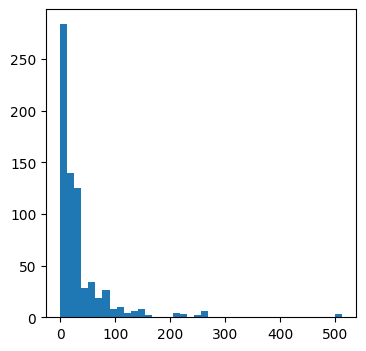

In [34]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.hist(df['fare'], bins=40)

plt.show()

#### QQPlot

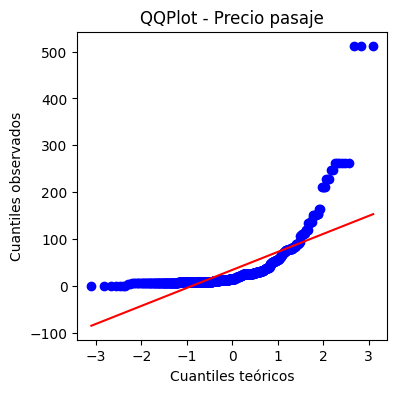

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))

st.probplot(df['fare'], dist="norm", plot=ax)
ax.set_title("QQPlot - Precio pasaje")
ax.set_xlabel("Cuantiles teóricos")
ax.set_ylabel("Cuantiles observados")
plt.show()

#### Estadísticas varias

In [36]:
# Cálculos directamente sobre df['fare']
media = df['fare'].mean()
var = df['fare'].var()
std_dev = df['fare'].std()
mediana = df['fare'].median()
skewness = df['fare'].skew()
curtosis = df['fare'].kurtosis()

# Impresión de los resultados
print(f"Media: {media:.02f}")
print(f"Varianza: {var:.02f}")
print(f"Desvío estándar: {std_dev:.02f}")
print(f"Mediana: {mediana:.02f}")
print(f"Skewness: {skewness:.02f}")
print(f"Curtosis: {curtosis:.02f}")

Media: 34.57
Varianza: 2802.50
Desvío estándar: 52.94
Mediana: 15.65
Skewness: 4.67
Curtosis: 31.01


#### Quantiles

In [37]:
Q1 = df['fare'].quantile(0.25)
Q2 = df['fare'].quantile(0.50)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 (25%):", Q1)
print(f"Q2 (50%): {Q2:.2f}")
print("Q3 (75%):", Q3)

print("Rango intercuartil (IQR):", IQR)

Q1 (25%): 8.05
Q2 (50%): 15.65
Q3 (75%): 33.0
Rango intercuartil (IQR): 24.95


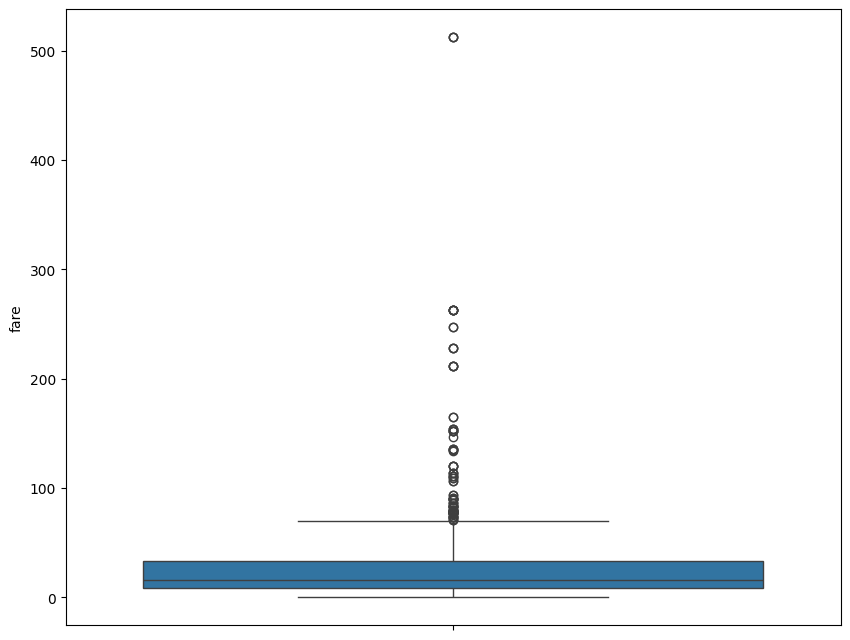

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, y='fare', ax=ax)
plt.show()

### Analizamos un subconjunto de los datos

Limitamos el dataset solo a los pasajeros con valor de pasaje <=150 y volvemos a analizar.

In [41]:
df_lim = df[df['fare']<=150]
df_lim.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


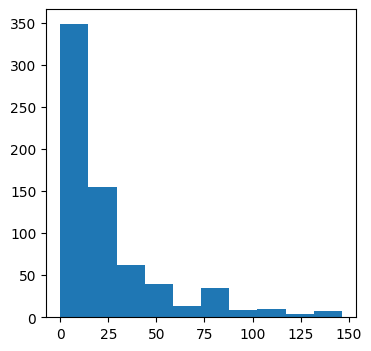

In [42]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.hist(df_lim['fare'], bins=10)
plt.show()

In [43]:
media = df_lim['fare'].mean()
mediana = df_lim['fare'].median()
skewness = df_lim['fare'].skew()
curtosis = df_lim['fare'].kurtosis()

print(f"Media: {media:.02f}")
print(f"Mediana: {mediana:.02f}")
print(f"Skewness: {skewness:.02f}")
print(f"Curtosis: {curtosis:.02f}")

Media: 26.39
Mediana: 14.45
Skewness: 1.98
Curtosis: 3.78


#### Visualizamos la variable con Boxplots

Cruzamos el precio del pasaje (fare) con otras variables

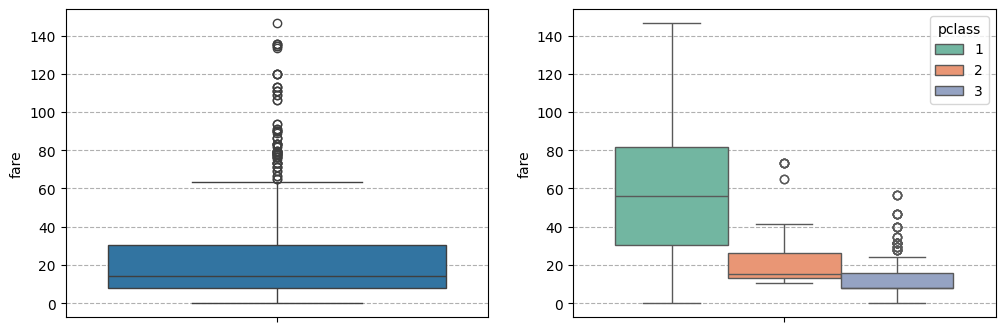

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

# ejemplo:
sns.boxplot(data=df_lim, y='fare', hue='pclass', ax=ax[1], palette='Set2') # el precio según la clase (atributo 'pclass')
sns.boxplot(data=df_lim, y='fare', ax=ax[0])

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='pclass', loc='upper right')

plt.show()